In [1]:
!pip install text-hammer

In [2]:
!pip install imblearn

In [3]:
!pip install --upgrade scikit-learn

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

# import imblearn
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('mbti_1.csv')
#df1=df[]
print(len(df))
df.head()

8675


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df=df.dropna()
df.reset_index(inplace=True)
df.head()
print(df.type)

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object


In [5]:
import text_hammer as th
import spacy
nlp = spacy.load("en_core_web_sm")

def text_preprocessing(df,col_name):
    column = col_name
    type(df[column])
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    print(type(df[column]))
    print(1)
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    print(type(df[column]))
    print(2)
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    print(type(df[column]))
    print(3)
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    print(type(df[column]))
    print(4)
    df[column] = df[column].progress_apply(lambda x: th.remove_urls(x))
    print(df[column])
    print(4)
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
    print(type(df[column]))
    print(5)
    #df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
    #print(type(df[column]))
    print(6)
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(str(x)))
    print(type(df[column]))
    df[column]=pd.Series(df[column])
    print(7)
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    print(type(df[column]))
    print(8)
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    print(type(df[column]))
    print(9)
    return(df)

In [6]:
# df=text_preprocessing(df1,"posts")

import time
# Record the start time
start_time = time.time()

# Your program code goes here
df=text_preprocessing(df,"posts")
# Record the end time
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

print(f"Time taken: {time_taken:.5f} seconds")

  0%|          | 0/8675 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
1


  0%|          | 0/8675 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
2


  0%|          | 0/8675 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
3


  0%|          | 0/8675 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
4


  0%|          | 0/8675 [00:00<?, ?it/s]

0       '||||||enfp and intj moments    sportscenter n...
1       'i am finding the lack of me in these posts ve...
2       'good one  _____   |||of course, to which i sa...
3       'dear intp,   i enjoyed our conversation the o...
4       'you're fired.|||that is another silly misconc...
                              ...                        
8670    '|||ixfp just because i always think of cats a...
8671    'so...if this thread already exists someplace ...
8672    'so many questions when i do these things.  i ...
8673    'i am very conflicted right now when it comes ...
8674    'it has been too long since i have been on per...
Name: posts, Length: 8675, dtype: object
4


  0%|          | 0/8675 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
5
6


  0%|          | 0/8675 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
7


  0%|          | 0/8675 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
8


  0%|          | 0/8675 [00:00<?, ?it/s]

<class 'pandas.core.series.Series'>
9
Time taken: 1865.88145 seconds


In [7]:
type(df)
print(df.iloc[:,1])
print(df.head(10))

0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: object
   index  type                                              posts
0      0  INFJ  enfp intj moment sportscenter play prankswhat ...
1      1  ENTP  I find lack post alarmingsex boring position o...
2      2  INTP  good _ _ _ _ _ of course know blessing cursedo...
3      3  INTJ  dear intp enjoy conversation day esoteric gabb...
4      4  ENTJ  you re firedthat silly misconception approach ...
5      5  INTJ  1837 science perfect scientist claim is scient...
6      6  INFJ  no draw nail haha professional nail yes gel me...
7      7  INTJ  I tend build collection thing desktop use freq...
8      8  INFJ  sure good question distinction dependant perce...
9      9  INTP  I position actually let person reason unfortun...


In [8]:
y = df.iloc[:,1].values
print("before: \n",y)
le=LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(y)
for i in y[5]:
    if(i==1):
        print(list(y[5]).index(i))
        print(len(y[5]))
print("After: \n",y)

before: 
 ['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']
10
16
After: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


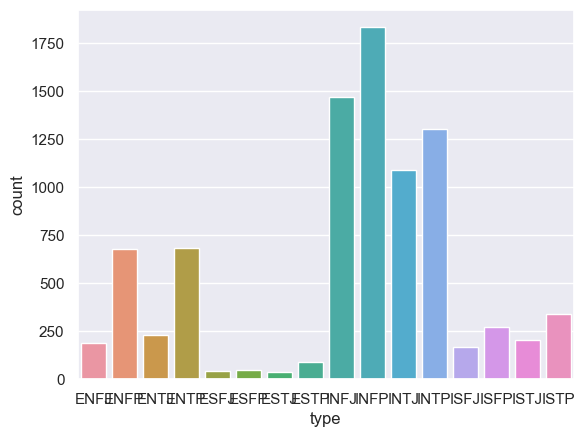

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set()
# Convert the column to categorical type
df.iloc[:, 1] = pd.Categorical(df.iloc[:, 1])
t=list(set(df.iloc[:,1]))

# Plot the count of each category
sns.countplot(x=df.iloc[:, 1])
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'like'),
  Text(1, 0, 'think'),
  Text(2, 0, 'people'),
  Text(3, 0, 'know'),
  Text(4, 0, 'I'),
  Text(5, 0, 'you'),
  Text(6, 0, 'thing'),
  Text(7, 0, 'feel'),
  Text(8, 0, 'time'),
  Text(9, 0, 'good'),
  Text(10, 0, 'want'),
  Text(11, 0, 'type'),
  Text(12, 0, 'it'),
  Text(13, 0, 'love'),
  Text(14, 0, 'way'),
  Text(15, 0, 'friend'),
  Text(16, 0, 'go'),
  Text(17, 0, 'find'),
  Text(18, 0, 'say'),
  Text(19, 0, 'try'),
  Text(20, 0, 'not'),
  Text(21, 0, 'lot'),
  Text(22, 0, 'get'),
  Text(23, 0, 'well'),
  Text(24, 0, 'work'),
  Text(25, 0, 'look'),
  Text(26, 0, 'come'),
  Text(27, 0, 'life'),
  Text(28, 0, 'need'),
  Text(29, 0, 're')])

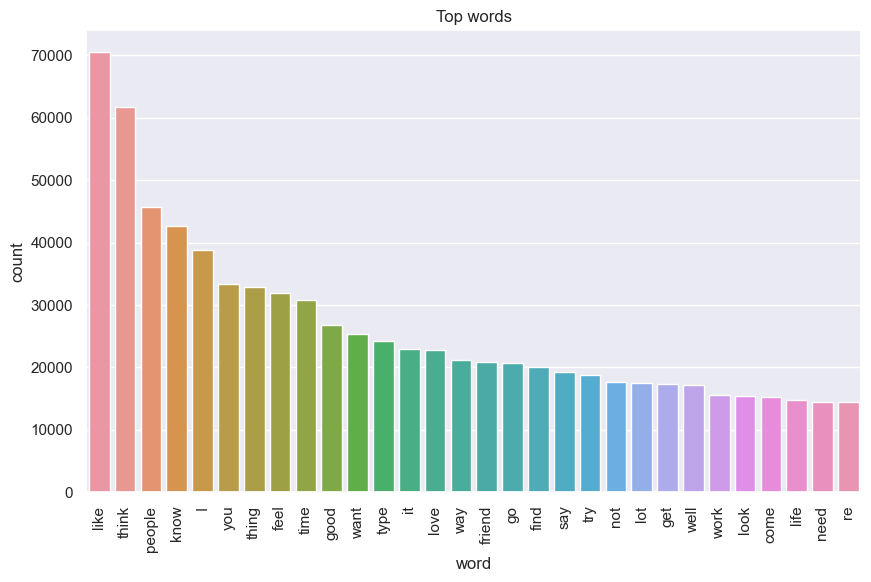

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
words_list = []
for post in df['posts']:
    words_list.extend(nltk.word_tokenize(post))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical')

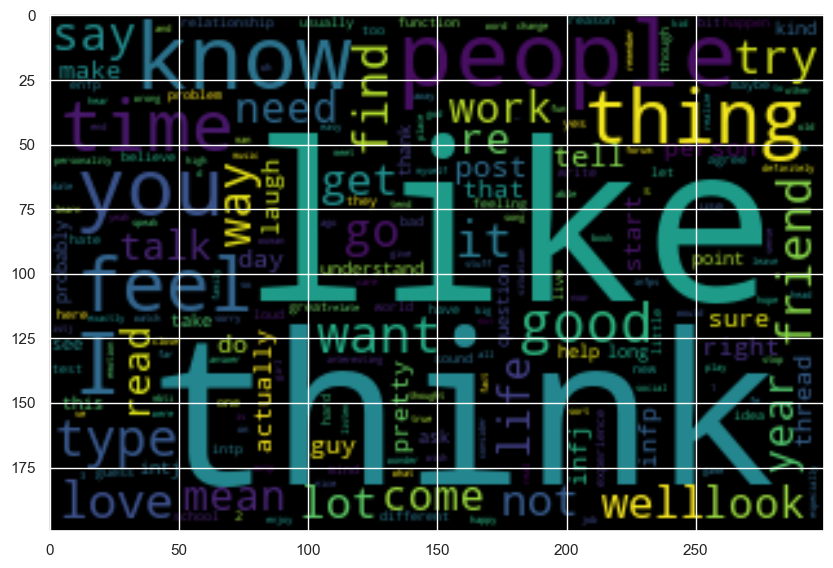

In [11]:
!pip install wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

In [12]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df.head()

,index,type,posts,words_per_comment
0,0,INFJ,enfp intj moment sportscenter play prankswhat ...,5.64
1,1,ENTP,I find lack post alarmingsex boring position o...,10.62
2,2,INTP,good _ _ _ _ _ of course know blessing cursedo...,8.24
3,3,INTJ,dear intp enjoy conversation day esoteric gabb...,9.94
4,4,ENTJ,you re firedthat silly misconception approach ...,9.00


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.0% of the points cann

<AxesSubplot:xlabel='type', ylabel='words_per_comment'>

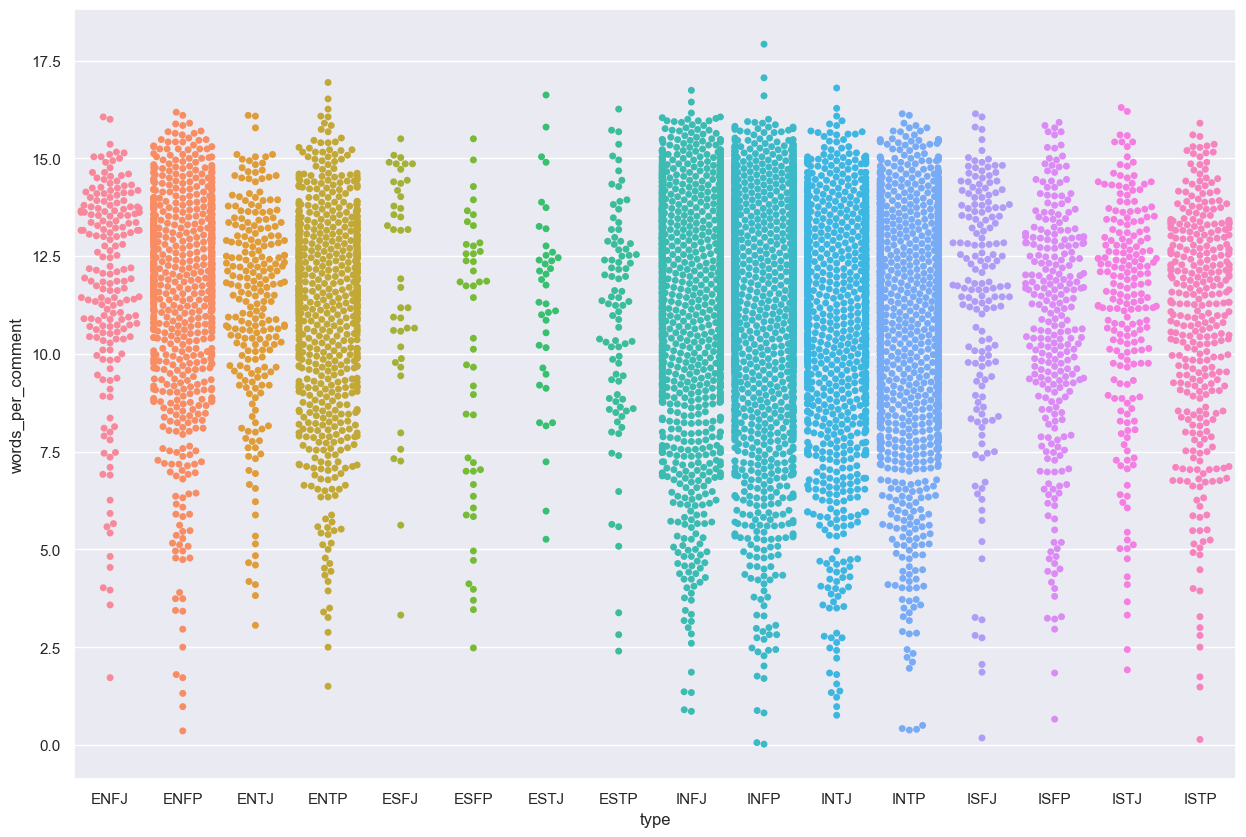

In [13]:
plt.figure(figsize=(15,10))
# sns.swarmplot("type", "words_per_comment", data=df)
sns.swarmplot(x="type", y="words_per_comment", data=df)

In [14]:
voc_size = 50000
messages=df['posts'].copy()
messages

0       enfp intj moment sportscenter play prankswhat ...
1       I find lack post alarmingsex boring position o...
2       good _ _ _ _ _ of course know blessing cursedo...
3       dear intp enjoy conversation day esoteric gabb...
4       you re firedthat silly misconception approach ...
                              ...                        
8670    ixfp think cat fi dom reason especially websit...
8671    soif thread exist someplace which do heck dele...
8672    so question thing purple pill pick win lottery...
8673    I conflict right come want child honestly mate...
8674    it long personalitycafe change bit good like t...
Name: posts, Length: 8675, dtype: object

In [15]:
ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]','',messages[i])
    review=review.lower()
    review=review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=''.join(review)
    corpus.append(review)
#print(corpus)

In [16]:
oe=[one_hot(words,voc_size) for words in corpus ]

In [17]:
sent_length=250
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)
embedded_docs

array([[    0,     0,     0, ...,     0,     0, 38972],
       [    0,     0,     0, ...,     0,     0, 34920],
       [    0,     0,     0, ...,     0,     0, 36958],
       ...,
       [    0,     0,     0, ...,     0,     0, 24252],
       [    0,     0,     0, ...,     0,     0, 23775],
       [    0,     0,     0, ...,     0,     0, 17499]])

In [18]:
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

# Model Training

In [19]:
dimension=100
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length = sent_length))
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 dropout (Dropout)           (None, 250, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 16)                1616      
                                                                 
Total params: 5,082,016
Trainable params: 5,082,016
Non-trainable params: 0
_________________________________________________________________


In [20]:
X=np.array(embedded_docs)

In [21]:
ros = RandomOverSampler(random_state=42) # fit predictor and target variable
x_rus, y_rus = ros.fit_resample(X, y)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)
print((y_train[6]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [23]:
y_train.shape
callbacks = [EarlyStopping( monitor="val_accuracy", patience=2 ), 
             ModelCheckpoint('model0.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [24]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64, callbacks = callbacks )

Epoch 1/5
367/367 [==============================] - ETA: 0s - loss: 2.1752 - accuracy: 0.3479
Epoch 1: val_accuracy improved from -inf to 0.75371, saving model to model0.h5
367/367 [==============================] - 289s 777ms/step - loss: 2.1752 - accuracy: 0.3479 - val_loss: 1.0111 - val_accuracy: 0.7537
Epoch 2/5
367/367 [==============================] - ETA: 0s - loss: 0.6114 - accuracy: 0.8452
Epoch 2: val_accuracy improved from 0.75371 to 0.83728, saving model to model0.h5
367/367 [==============================] - 292s 796ms/step - loss: 0.6114 - accuracy: 0.8452 - val_loss: 0.4962 - val_accuracy: 0.8373
Epoch 3/5
367/367 [==============================] - ETA: 0s - loss: 0.2306 - accuracy: 0.9555
Epoch 3: val_accuracy improved from 0.83728 to 0.84598, saving model to model0.h5
367/367 [==============================] - 296s 808ms/step - loss: 0.2306 - accuracy: 0.9555 - val_loss: 0.4802 - val_accuracy: 0.8460
Epoch 4/5
367/367 [==============================] - ETA: 0s - loss

In [25]:
from sklearn.metrics import accuracy_score
print(len(x_test[0]))
preds = model.predict(x_test)
#print(preds)
#print(y_test)
o=np.argmax(preds,axis=1)
#for i in o:
#    print(t[i])
#print("Emotion:",len(y))

250
184/184 [==============================] - 14s 70ms/step


# Giving Input and Getting the Personality

In [26]:
s=input()
s =str(s).lower()
s=th.cont_exp(s) #you're -> you are; i'm -> i am
s=th.remove_emails(s)
s =th.remove_html_tags(s)
s=th.remove_urls(s)
s = th.remove_stopwords(s)
    #df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
    #print(type(df[column]))
s =th.remove_special_chars(s)
s = th.remove_accented_chars(s)
s = th.make_base(s) #ran -> run,
#print(s)
words_list = []
words_list.extend(nltk.word_tokenize(s))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
#fig, ax = plt.subplots(figsize=(10, 6))
#sns.barplot(x='word', y='count', data=temp, ax=ax)
ps=PorterStemmer()
corpus=[]
review = re.sub('[^a-zA-Z]','',s)
review=review.lower()
review=review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
review=''.join(review)
corpus.append(review)
oe=[one_hot(words,voc_size) for words in corpus ]
sent_length=250
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)
embedded_docs
X=np.array(embedded_docs)
p=model.predict(X)
o1=np.argmax(p,axis=1)
print("Personality:",t[o1[0]])

It is a sunny day.
1/1 [==============================] - 0s 22ms/step
Personality: INTP


# Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
     true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))

[[371   0   2   1   0   0   0   0   0   1   1   1   0   1   0   0]
 [  1 303   0   2   0   0   0   0   9   6   3   2   0   0   0   0]
 [  0   0 375   2   0   0   0   0   2   1   1   2   0   0   0   0]
 [  0   4   2 291   0   0   0   0   6   3   1   4   4   2   0   4]
 [  0   0   0   0 382   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0 371   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   1   0   0 344   0   0   1   0   0   0   0   0   0]
 [  0   1   0   0   0   0   7 391   1   0   2   0   6   0   0   0]
 [  0   6   4  10   0   0   0   0 139  72  30  31   0   0   0   2]
 [  0  20   2  12   0   0   0   0  83 105  55  64   0   2   0   0]
 [  0   8   3   3   0   0   0   0  34  47 232  21   0   0   0   0]
 [  0   9   3  18   0   0   0   0  77 103  43 213   0   1   0   1]
 [  4   2   2   0   0   0   0   0   1   3   4   0 340   0   1   2]
 [  0   2   0   1   0   0   0   0   3   2   2   1   0 381   0   0]
 [  0   4   5   1   0   0   0   0   3   0   1   1   0   0 352 